In [1]:
!jupyter nbconvert --to html Emissions_Analysis.ipynb

[NbConvertApp] Converting notebook Emissions_Analysis.ipynb to html
[NbConvertApp] Writing 4675182 bytes to Emissions_Analysis.html


In [2]:
#importing libraries
import pandas as pd
import plotly.express as px
import math

In [3]:
#files path
temperatures = 'temperature-anomaly.csv'
co2_conc = 'co2-concentration-long-term.csv'
emissions = 'annual-co-emissions-by-region.csv'
emissions_gdp = 'co2-emissions-and-gdp.csv'

## 1. TEMPERATURES ANOMALIES

>First, let's look at temperature anomalies around the world since 1850.<br>
Our dataset includes the mean deviation of the temperature from the 1961-1990 median, as well as the highest and lowest peak for each year.<br>
The file contains data for 4 different regions: global, northern and southern hemispheres, and tropics.<br>
The time span goes from: 1850 to 2019.<br>

In [4]:
df = pd.read_csv(temperatures)

In [5]:
#Renaming column for practical reasons
df.rename(columns={'Median temperature anomaly from 1961-1990 average':'AVG Anomaly','Upper bound (95% CI)':'Upper bound', 'Lower bound (95% CI)':'Lower bound'}, inplace=True)

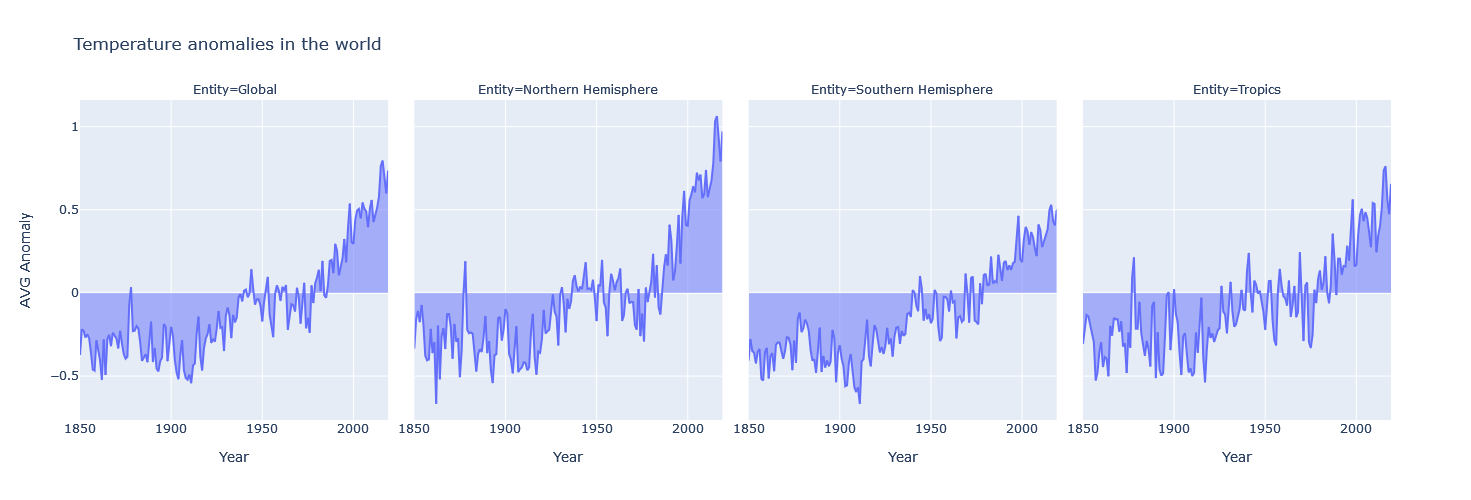

In [6]:
#Plotting
fig = px.area(df, x='Year', y='AVG Anomaly', facet_col="Entity", facet_col_wrap=4, title='Temperature anomalies in the world',  width=1500, height=500)
fig.show()

>What we are seeing shows that the average temperature has been rising since the 1975. The phenomena appears to be stronger in the Northern Hemisphere.

## 2. GLOBAL CO2 CONCENTRATION

In [7]:
df = pd.read_csv(co2_conc)

In [8]:
#We are interested in the 1850 - 2018 timeframe
df = df[(df.Year >= 1850)]

In [9]:
#Renaming and filtering the dataframe
df.rename(columns={'CO2 concentrations (NOAA, 2018)':'CO2 concentrations'}, inplace=True)
col = ['Year', 'CO2 concentrations']
df = df[col]

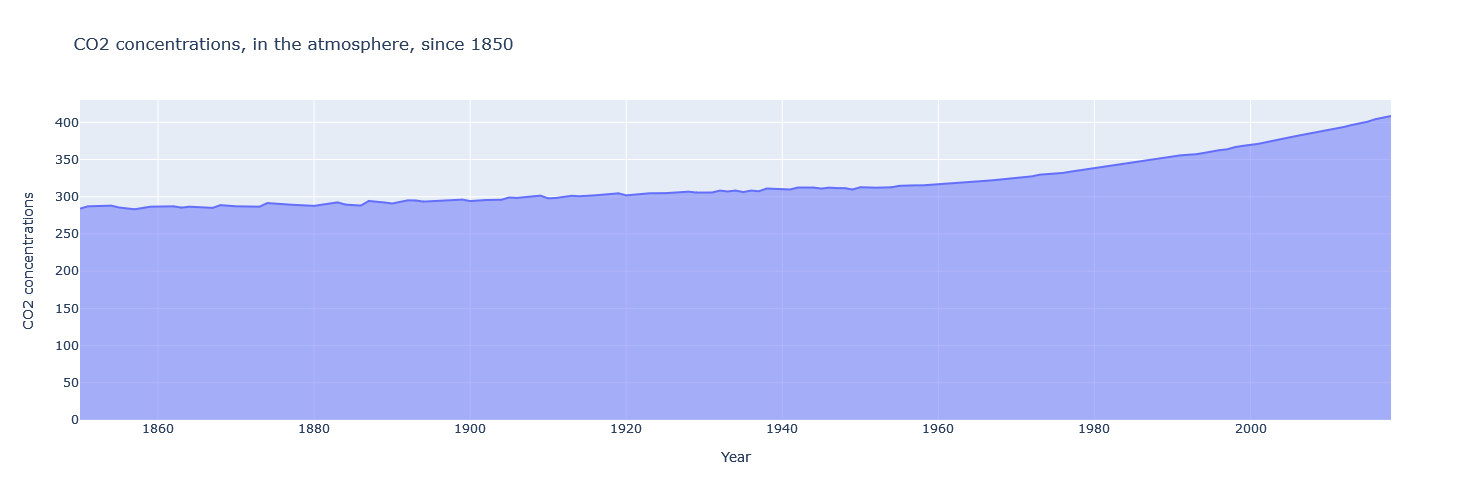

In [10]:
#plotting for CO2 concentrations
fig = px.area(df, x='Year', y='CO2 concentrations', title='CO2 concentrations, in the atmosphere, since 1850', height=500)
fig.show()

>CO2 concentrations gradually increased between 1850 and 1950. However, exponential growth has been accelerating since the 1960s.<br>
<br>
Let's check the actual numbers of CO2 in the atmosphere in: 1850, 1900, 1950, 2018.

In [11]:
print(f"CO2 concentrations in 1850 was {df.iloc[0,1]}")
print(f"CO2 concentration in 2019 was {df.iloc[-1,1]}")

CO2 concentrations in 1850 was 284.0
CO2 concentration in 2019 was 408.52


In [12]:
#We are going to get the values of CO2 concentrations for: 1850, 1900, 1950, 2018
df1850 = df.loc[df['Year'] == 1850, ['CO2 concentrations']]
x=df1850.iloc[0,0]
df1900 = df.loc[df['Year'] == 1900, ['CO2 concentrations']]
y=df1850.iloc[0,0]
df1950 = df.loc[df['Year'] == 1950, ['CO2 concentrations']]
z=df1950.iloc[0,0]
df2018 = df.loc[df['Year'] == 2018, ['CO2 concentrations']]
w=df2018.iloc[0,0]

In [13]:
print('The percentage increase of CO2 concentration between 1850 and 1900 is:')
print(f'{math.ceil(((y-x)/y)*100)}%')
print('The percentage increase of CO2 concentration between 1900 and 1950 is:')
print(f'{math.ceil(((z-y)/z)*100)}%')
print('The percentage increase of CO2 concentration between 1950 and 2018 is:')
print(f'{math.ceil(((w-z)/w)*100)}%')

The percentage increase of CO2 concentration between 1850 and 1900 is:
0%
The percentage increase of CO2 concentration between 1900 and 1950 is:
10%
The percentage increase of CO2 concentration between 1950 and 2018 is:
24%


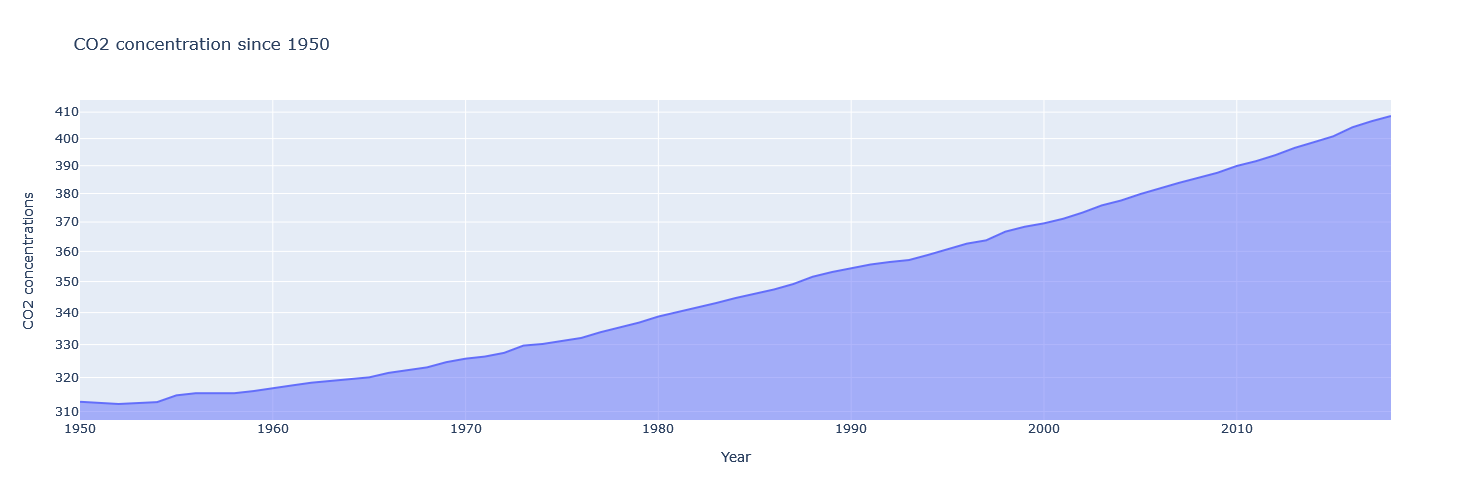

In [14]:
#Let's take a closer look. 1950 to 2018
df = df[(df.Year >= 1950)]
fig = px.area(df, x='Year', y='CO2 concentrations', title='CO2 concentration since 1950', log_y=True, height=500)
fig.show()

>CO2 levels have been rising at an unusually fast rate since the 1960s: the same interval in which the temperature mean deviation trend began to change.

## 3. ANNUAL CO2 EMISSION BY COUNTRIES

In [15]:
df=pd.read_csv(emissions)

In [16]:
#We are interested only in the 1850 - 2019 timeframe
df = df[(df.Year >= 1850)]

>The analysis starts by looking at the share of total emissions for each continent.

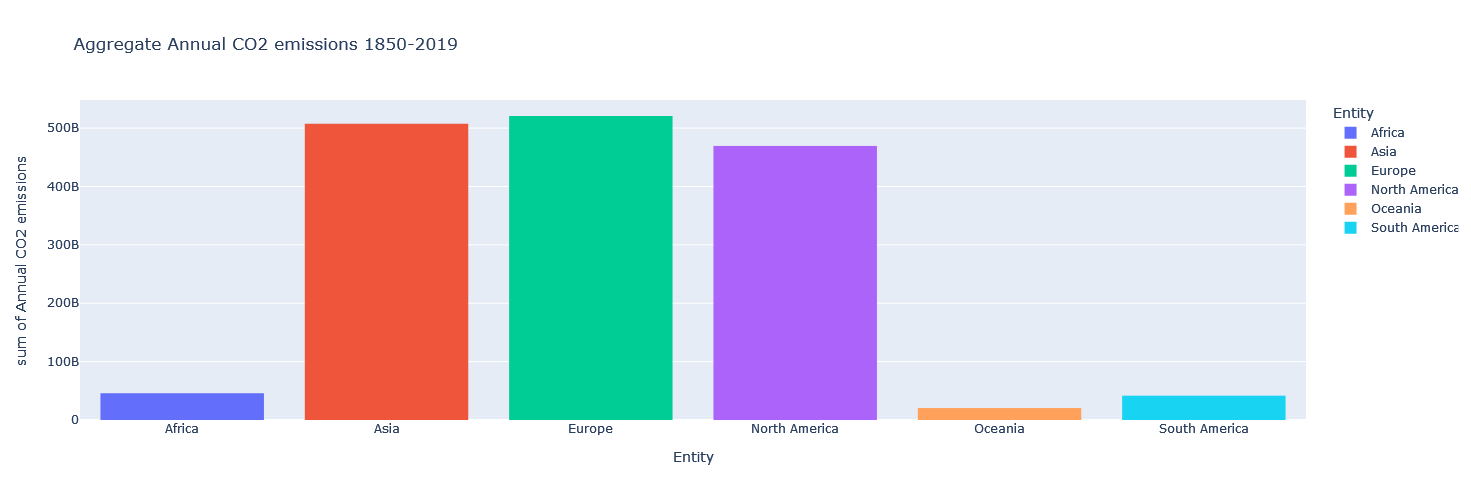

In [17]:
#We filter the dataset, since we are interesting only in the continent entities
continent = ['Europe', 'Africa', 'Asia', 'North America', 'South America', 'Oceania']
df_cont = df[df.Entity.isin(continent)]
df_cont
#Plotting the aggregate of annual CO2 emissions from 1850 to 2019
fig = px.histogram(df_cont, x='Entity', y='Annual CO2 emissions', color='Entity', title='Aggregate Annual CO2 emissions 1850-2019', height=500)
fig.show()

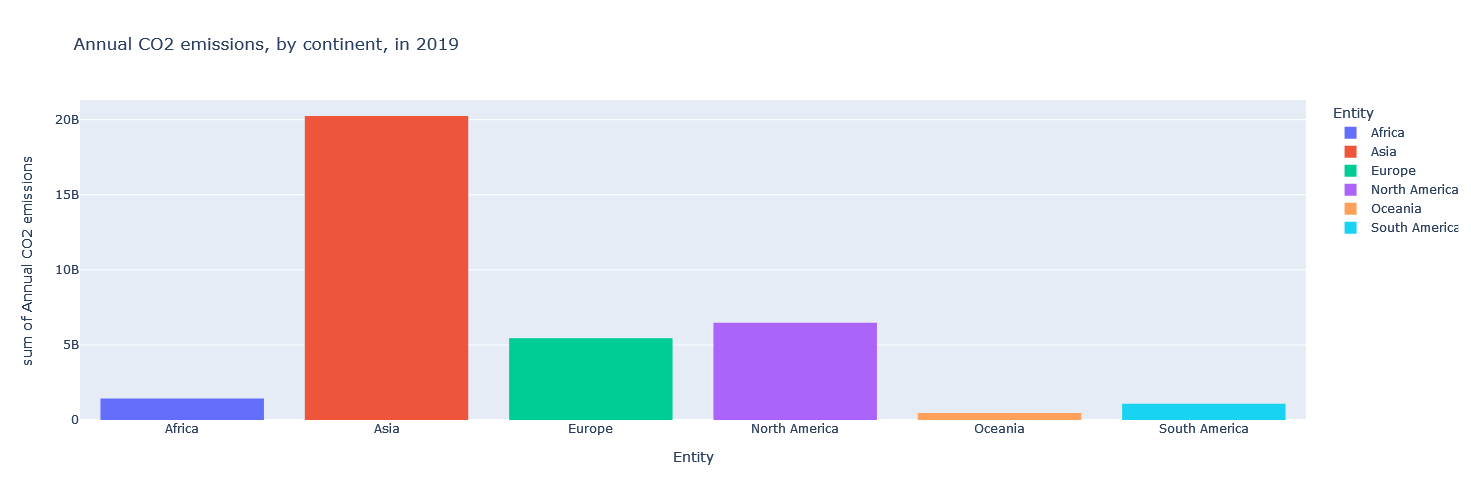

In [18]:
df_cont = df_cont[df_cont.Year == 2019]
#Plotting the annual CO2 emission only in 2019
fig = px.histogram(df_cont, x='Entity', y='Annual CO2 emissions', color='Entity', title='Annual CO2 emissions, by continent, in 2019', height=500)
fig.show()

>North America, Europe and Asia are the continents most responsible for CO2 accumulation in the atmosphere, which is not a surprise given how their economies and populations grew over the years. However, it appears that Europe and North America - although still emitting about half of global emissions - have left the lead to Asia. This is actually one of the biggest issues: western countries have prospered by polluting in the last centuries, and now developing countries want to follow the same path.<br>
Also, it is worth remembering that the areas of the world that are most vulnerable to climate change are the ones responsible to a lesser extent for CO2 emissions (Africa, South America, Oceania).

### 3.1 - European Region

>It's time to look into the CO2 emissions, for each countries.<br>
>At the beginning, we could see how the Northern Hemisphere was the portion of the globe that witnesses the biggest rise in temperature. So we are starting from there, precisely in the European region.

In [19]:
#Let's start with the 27 countries of European Union, plus United Kingdom, Switzerland and Norway

In [20]:
Euro = ['Portugal', 'Spain', 'France', 'Germany', 'Italy', 'United Kingdom', 'Ireland', 'Belgium', 'Netherlands', 'Denmark', 'Norway', 'Sweden', 'Finland', 'Austria', 'Poland', 'Hungary', 'Bulgaria', 'Greece', 'Croatia', 'Cyprus',
       'Czechia', 'Estonia', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Romania', 'Slovakia', 'Slovenia', 'Switzerland']

In [21]:
df_euro = df[df.Entity.isin(Euro)]

In [22]:
#Plotting Annual CO2 emissions from European Countries

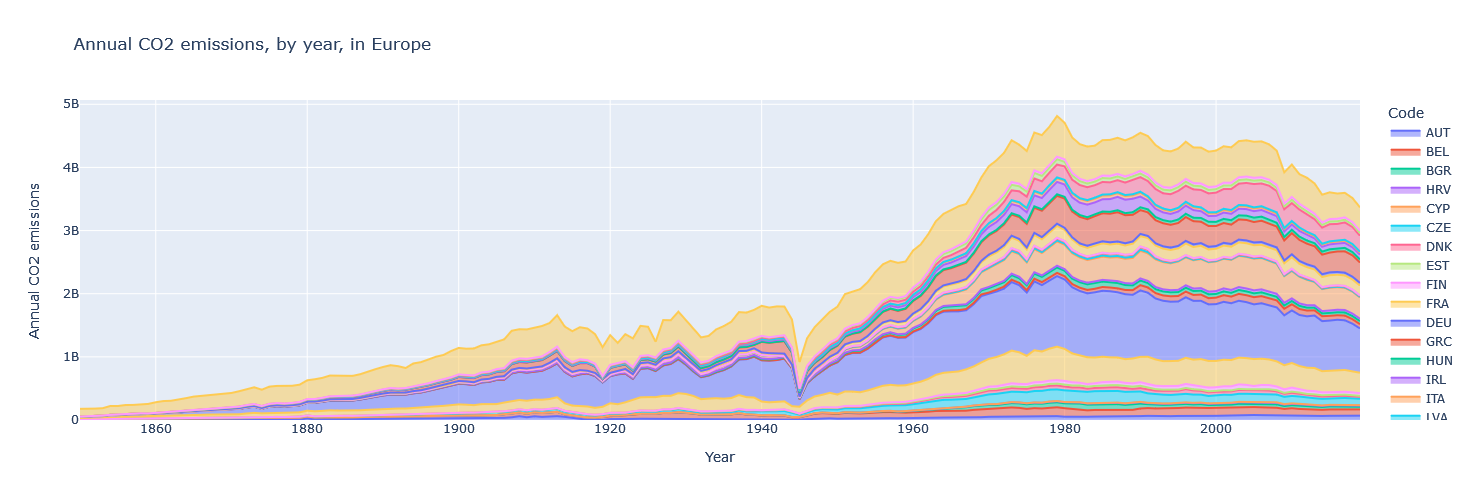

In [23]:
fig = px.area(df_euro, x='Year', y='Annual CO2 emissions', color='Code' ,line_group="Entity", title='Annual CO2 emissions, by year, in Europe', height=500)
fig.show()

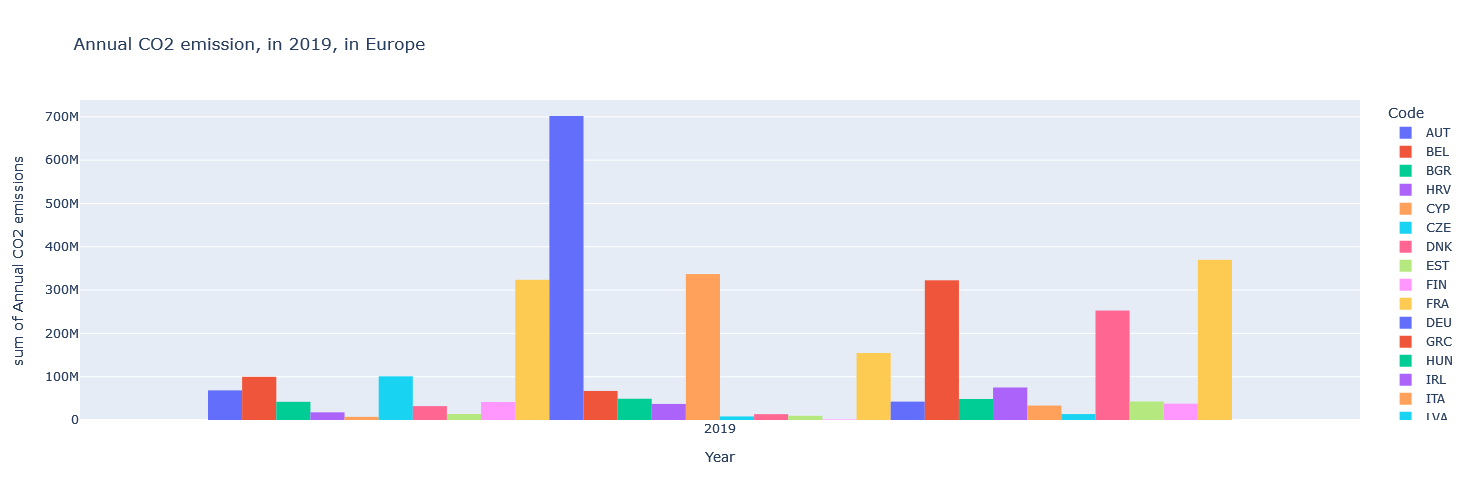

In [24]:
df_euro = df_euro[df_euro.Year == 2019]
#plotting
fig = px.histogram(df_euro, x='Year', y='Annual CO2 emissions', color='Code', barmode='group', nbins=30, title="Annual CO2 emission, in 2019, in Europe", height=500)
fig.show()

>Seems that in Europe the biggest polluting countries are Germany, France, Italy, the UK and Poland. Those (exept Poland) are four of the top 5 European countries by population. <br>
Let's deep dive with a graph covering these countries in particular.

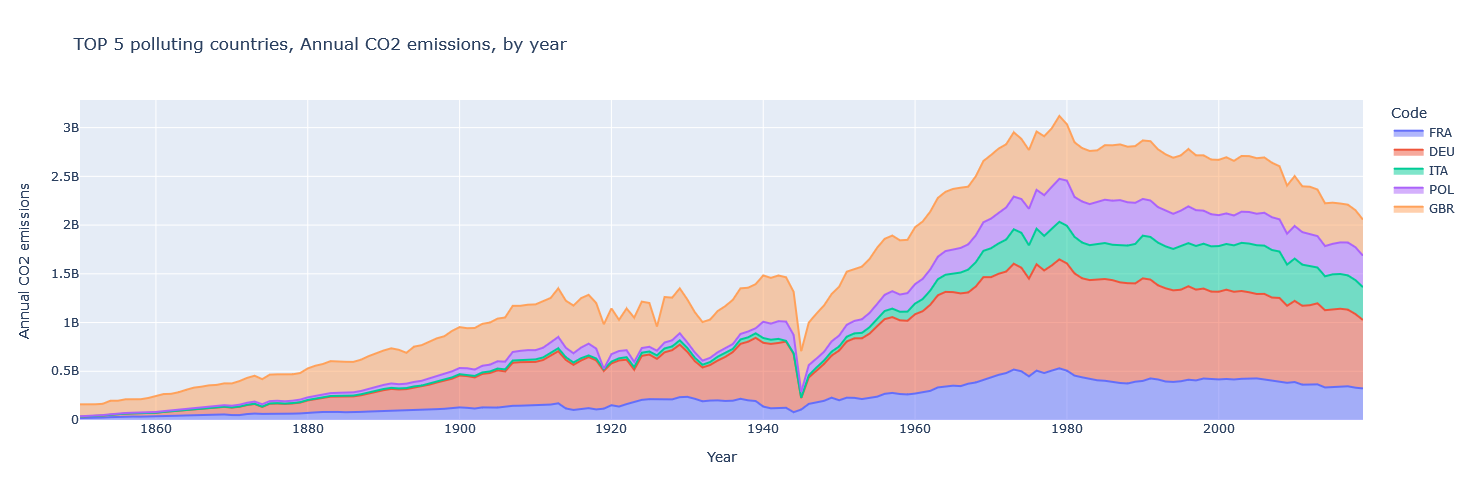

In [25]:
countries = ['Germany', 'France', 'Italy', 'United Kingdom', 'Poland']
top_euro = df[df.Entity.isin(countries)]
fig = px.area(top_euro, x='Year', y='Annual CO2 emissions', color='Code' ,line_group="Entity", title='TOP 5 polluting countries, Annual CO2 emissions, by year', height=500)
fig.show()

>Germany seems to be Europe's most polluter.
>The data about annual CO2 emissions in the European region seems to confirm our previous observations. Following WWII there is a notable increase of emissions. Fortunately, not only after the 1980's the phenomena apperas to have changed its course, but in the lasts years the emissions seems to be decreasing!<br>

### 3.2 - Asia: Russia, India, China

>The top three Asian economies are Russia, China, and India (for both gdp and population). So, let's begin in 1940 and work our way up to 2019. 

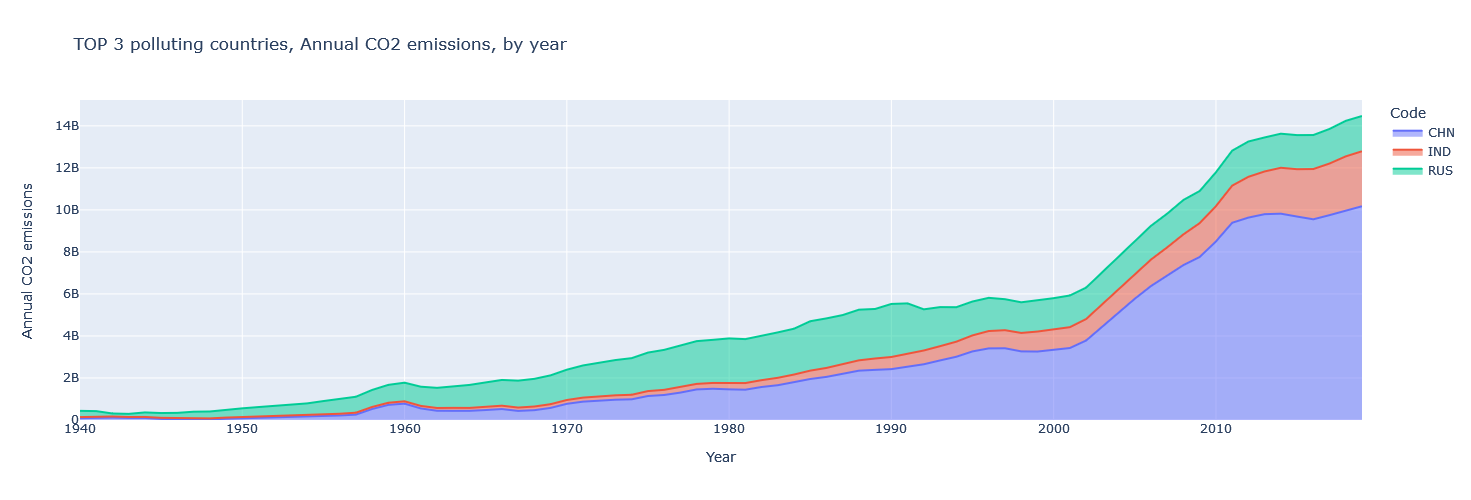

In [26]:
#filtering
asia = ['Russia', 'China', 'India']
asia_df = df[(df.Year >= 1940)]
asia_df = asia_df[asia_df.Entity.isin(asia)]
#plotting
fig = px.area(asia_df, x='Year', y='Annual CO2 emissions', color='Code' ,line_group="Entity", title='TOP 3 polluting countries, Annual CO2 emissions, by year', height=500)
fig.show()

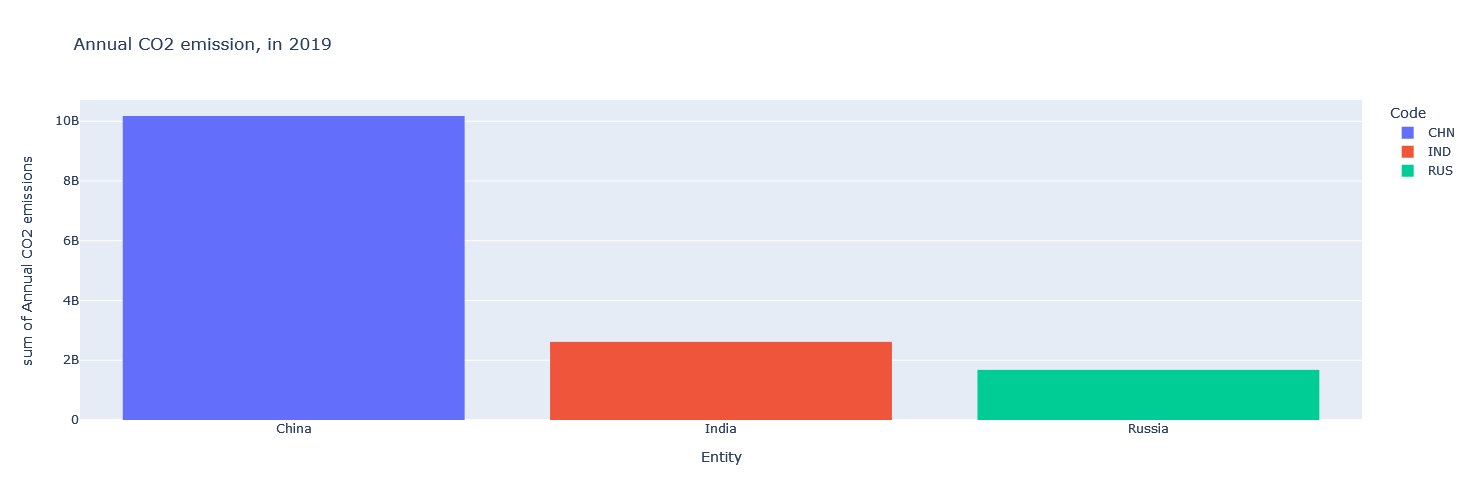

In [27]:
asia_df = asia_df[(asia_df.Year == 2019)]
#plotting
fig = px.histogram(asia_df, x='Entity', y='Annual CO2 emissions', color='Code' , title="Annual CO2 emission, in 2019", height=500)
fig.show()

>To begin with, when compared to the previous graph about Europe, what stands out is how only three countries combined can achieve a CO2 peak emission that is five times greater than the European one, despite the fact that the dynamics - and population sizes of the countries involved - are very different.
European countries polluted more between 1960 and 1980, but Asia experienced a dramatic increase in the first decade of the twenty-first century (mostly owing to China, which accounts for half of the continent's annual emissions)
<br>
Unfortunately, unlike in European countries, annual emissions do not appear to be dropping even in recent years.

### 3.3 Asia: Middle-East

>This part of the planet is rich in oil fields. Let's check if those are responsible for CO2 emissions.

In [28]:
#filtering
oil = ['Iraq', 'Iran', 'Kuwait', 'United Arab Emirates', 'Saudi Arabia', 'Qatar']
oil_df = df[(df.Year >= 1940)]
oil_df = oil_df[oil_df.Entity.isin(oil)]

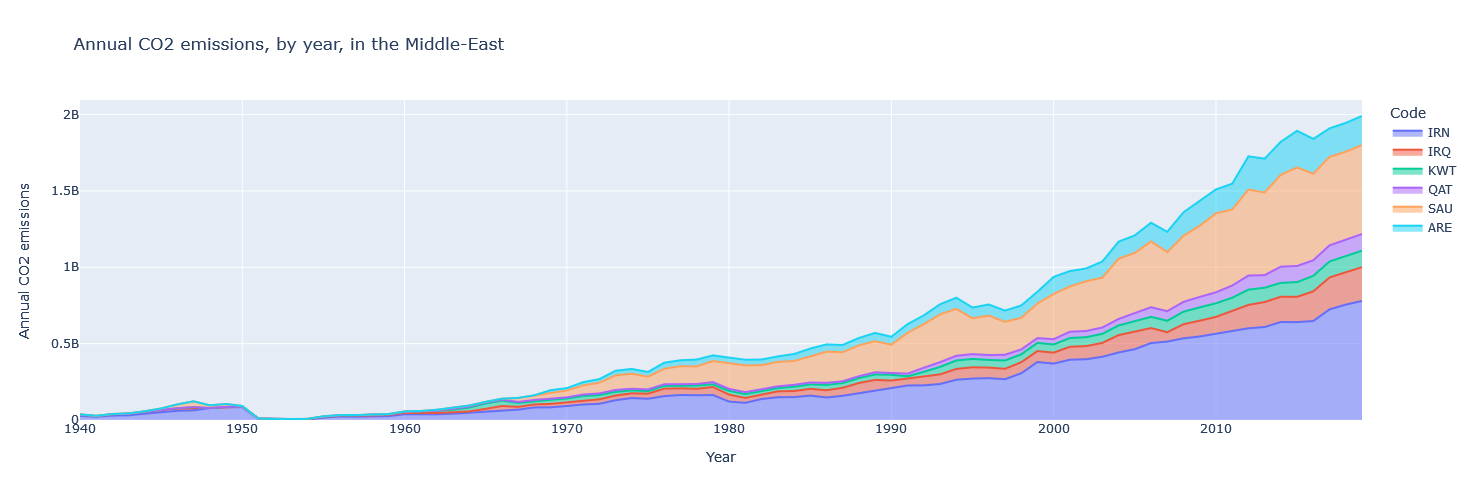

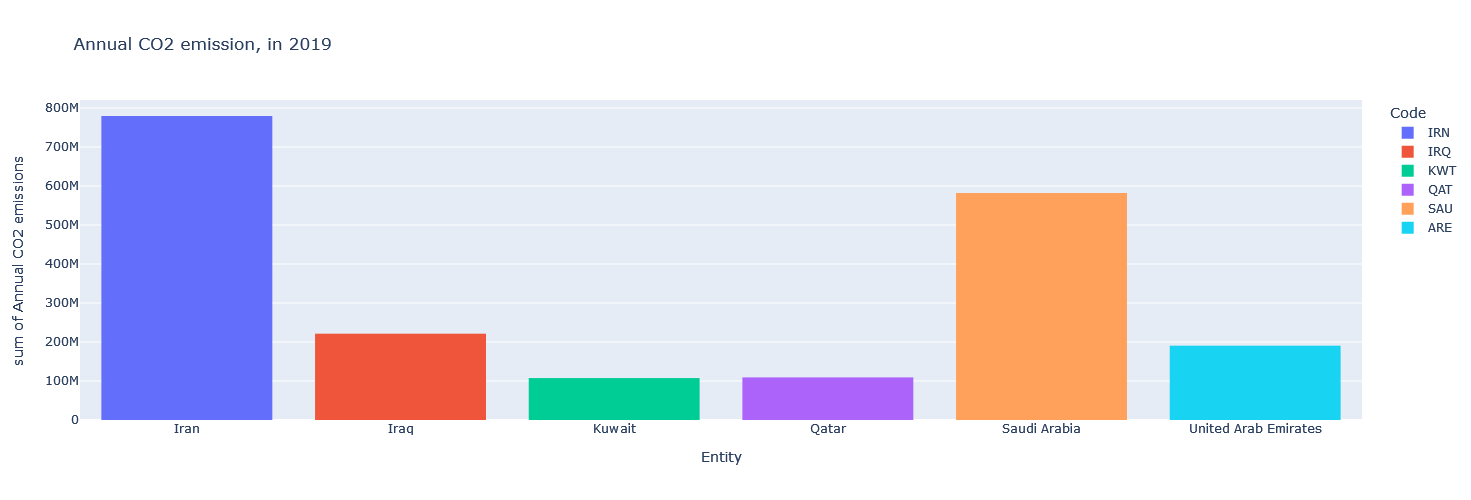

In [29]:
#plotting
fig = px.area(oil_df, x='Year', y='Annual CO2 emissions', color='Code' ,line_group="Entity", title='Annual CO2 emissions, by year, in the Middle-East', height=500)
fig.show()

oil_df = oil_df[(oil_df.Year == 2019)]
fig = px.histogram(oil_df, x='Entity', y='Annual CO2 emissions', color='Code' , title="Annual CO2 emission, in 2019", height=500)
fig.show()

>Since 1960, most likely due to resource exploitation, emissions have grown at a rapid rate, increasingly further towards the early 2000s and not seeming, unfortunately, to slow down.

### 3.4 - Asia: The South-East

In [30]:
SE_asia = ['Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']
SE_df = df[df.Year >= 1940]
SE_df = SE_df[SE_df.Entity.isin(SE_asia)]

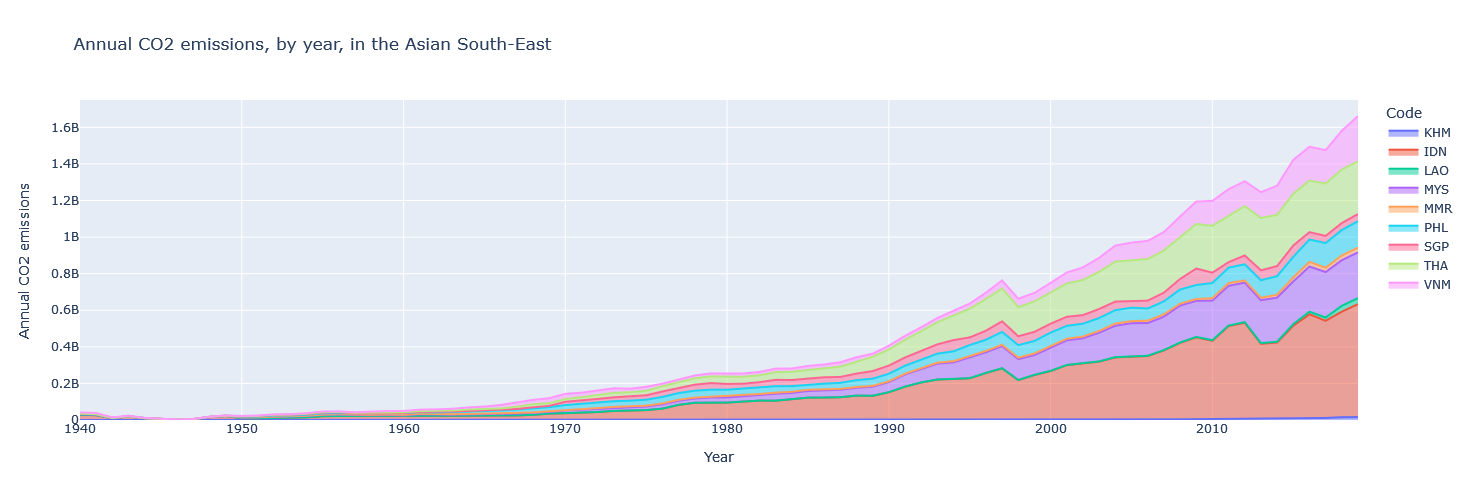

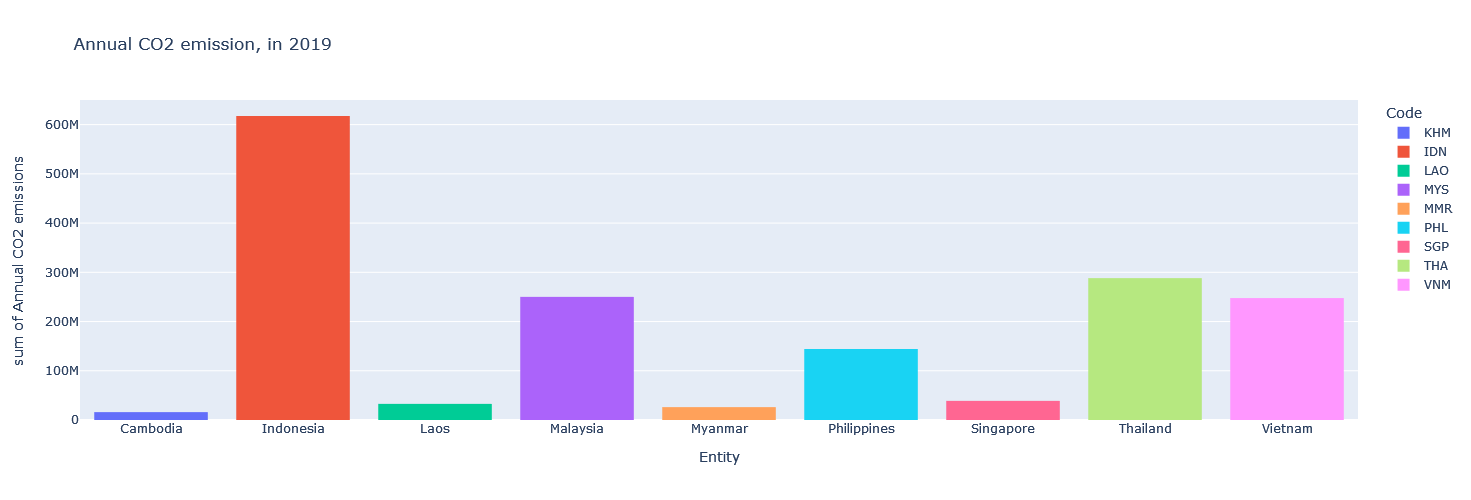

In [31]:
#plotting
fig = px.area(SE_df, x='Year', y='Annual CO2 emissions', color='Code' ,line_group="Entity", title='Annual CO2 emissions, by year, in the Asian South-East', height=500)
fig.show()

SE_df = SE_df[(SE_df.Year == 2019)]
fig = px.histogram(SE_df, x='Entity', y='Annual CO2 emissions', color='Code' , title="Annual CO2 emission, in 2019", height=500)
fig.show()

>Indonesia is the most polluting country in the region, followed by Vietnam, Thailand and Malaysia. Like many other developing countries, the pace of increases in emissions shows no sign of decreasing.

### 3.5 - Asia: South-Korea and Japan

>We finish our trip in Asia, with South Korea and Japan, two nations having greater HDIs than almost any other Asian country. Let's check if these countries' emissions patterns differ from those of developing countries.

In [32]:
KJ = ['South Korea', 'Japan']
KJ_df = df[df.Year >= 1940]
KJ_df = KJ_df[KJ_df.Entity.isin(KJ)]

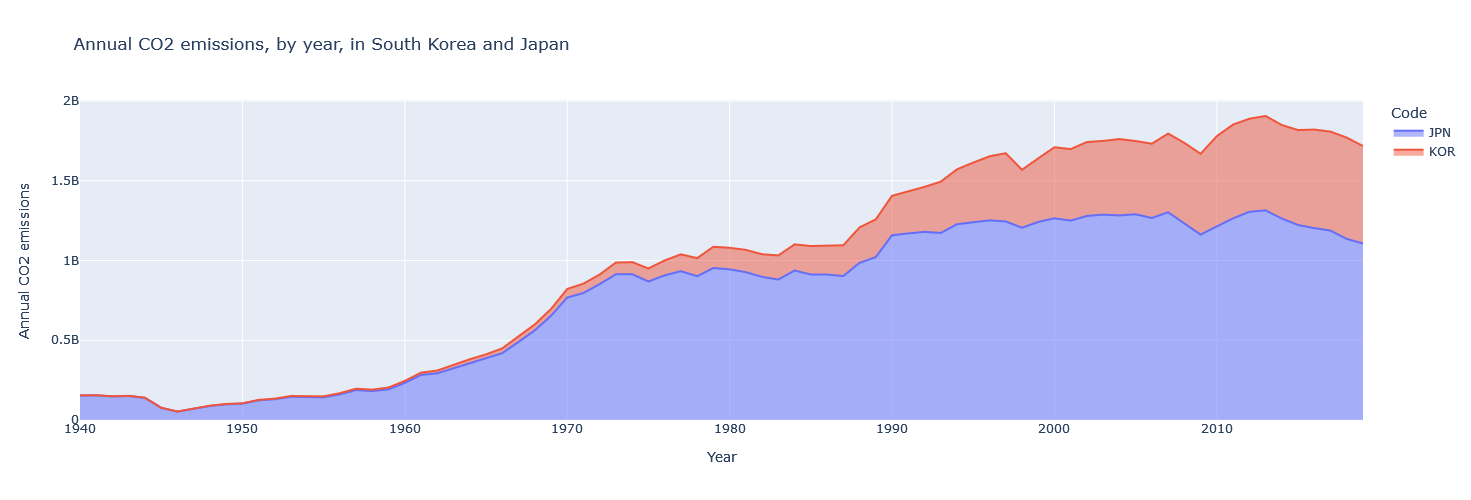

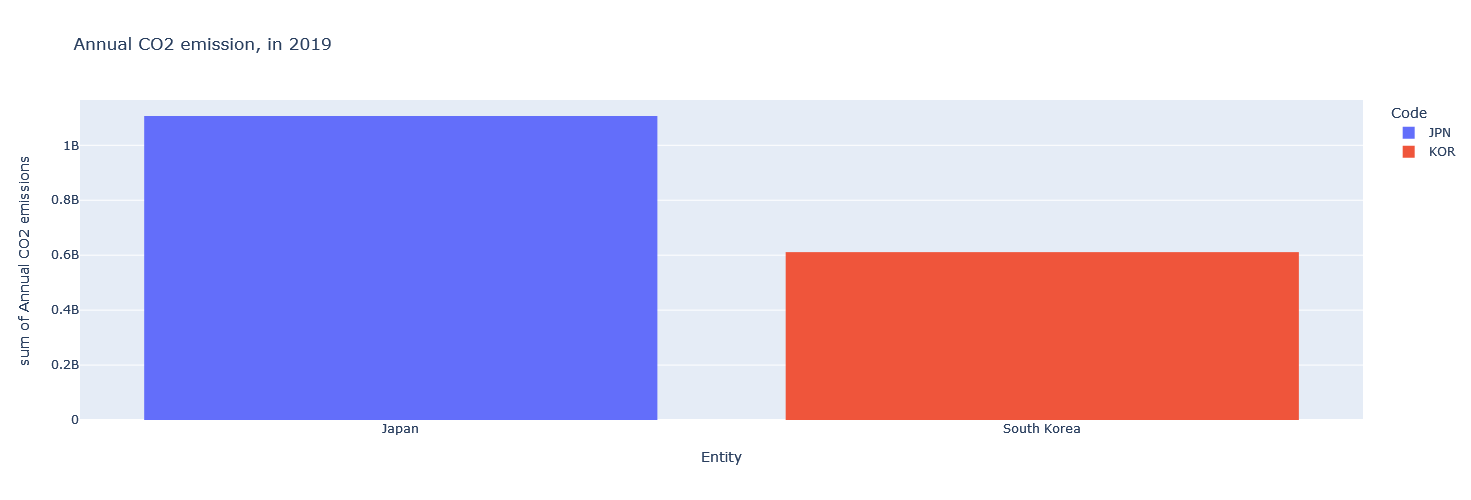

In [33]:
#plotting
fig = px.area(KJ_df, x='Year', y='Annual CO2 emissions', color='Code' ,line_group="Entity", title='Annual CO2 emissions, by year, in South Korea and Japan', height=500)
fig.show()

KJ_df = KJ_df[(KJ_df.Year == 2019)]
fig = px.histogram(KJ_df, x='Entity', y='Annual CO2 emissions', color='Code' , title="Annual CO2 emission, in 2019", height=500)
fig.show()

>The dynamics about CO2 pollution are more similar to what we have just seen in Europe than in any other Asian country. This could mean that there is a pattern and relationship between CO2 pollution and the economic status of a country: developed countries are starting to decrease their emissions, as opposed to developing countries.

### 3.6 - Africa: Egypt, Nigeria, South Africa, Algeria

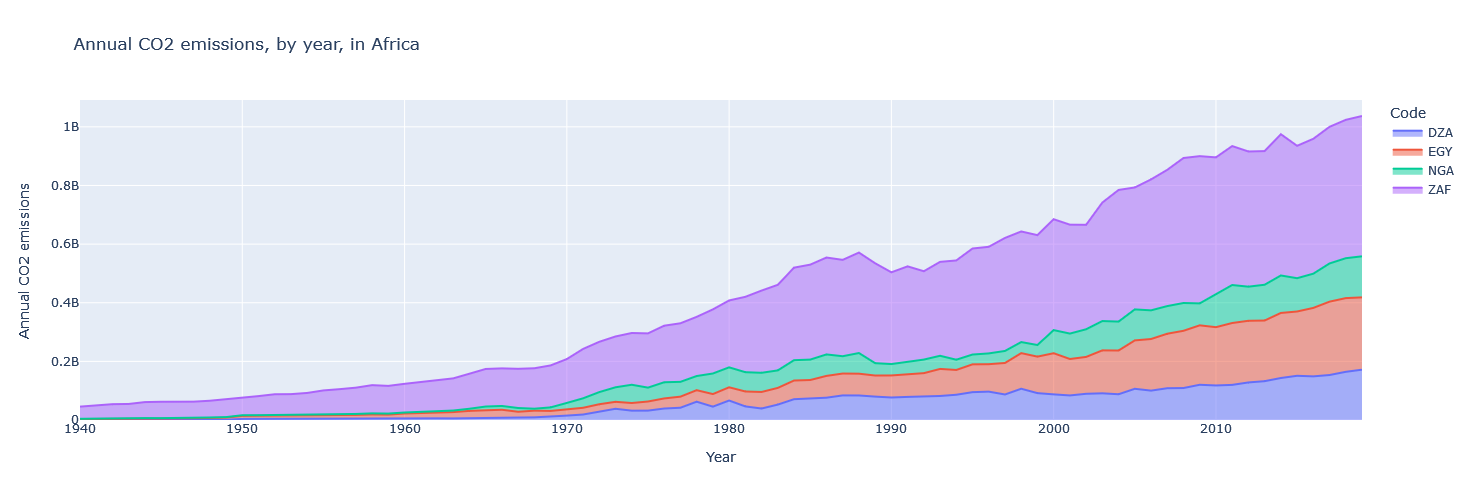

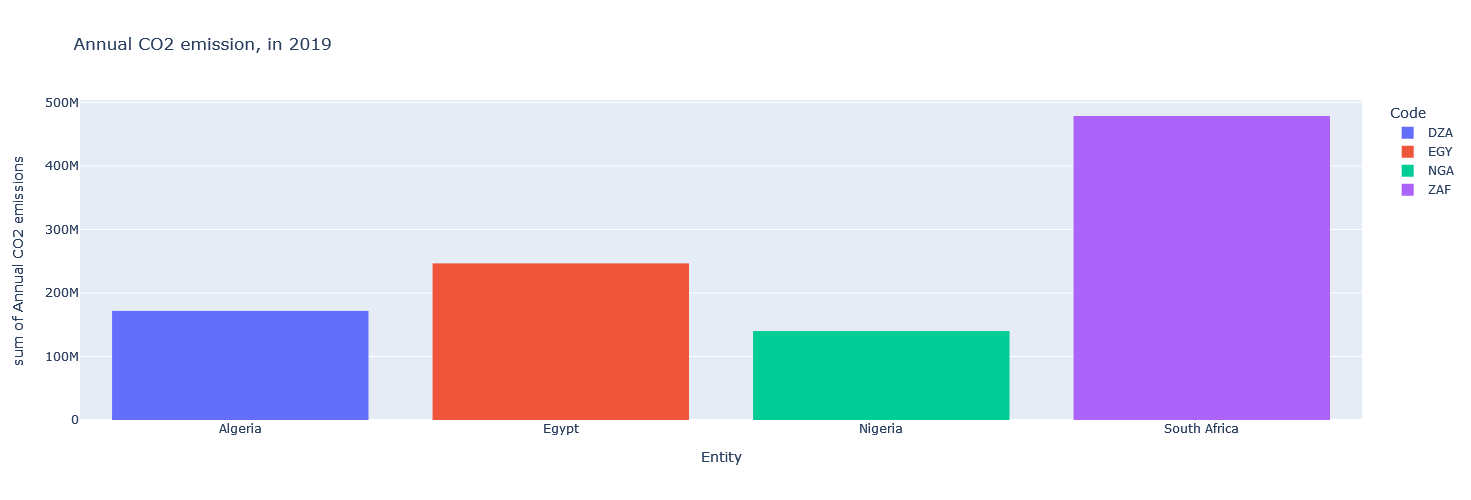

In [34]:
#filtering
africa = ['Egypt', 'Nigeria', 'South Africa', 'Algeria']
Africa_df = df[df.Year >= 1940]
Africa_df = Africa_df[Africa_df.Entity.isin(africa)]
#plotting
fig = px.area(Africa_df, x='Year', y='Annual CO2 emissions', color='Code' ,line_group="Entity", title='Annual CO2 emissions, by year, in Africa', height=500)
fig.show()

Africa_df = Africa_df[(Africa_df.Year == 2019)]
fig = px.histogram(Africa_df, x='Entity', y='Annual CO2 emissions', color='Code' , title="Annual CO2 emission, in 2019", height=500)
fig.show()

>In Africa the pattern is similar to that observed in other developing countries, emissions are not comparable in absolute value to those of more industrialized countries, but the increase is constant and shows no sign of reducing.

### 3.7 - South America: Brazil, Argetina, Chile, Venezuela

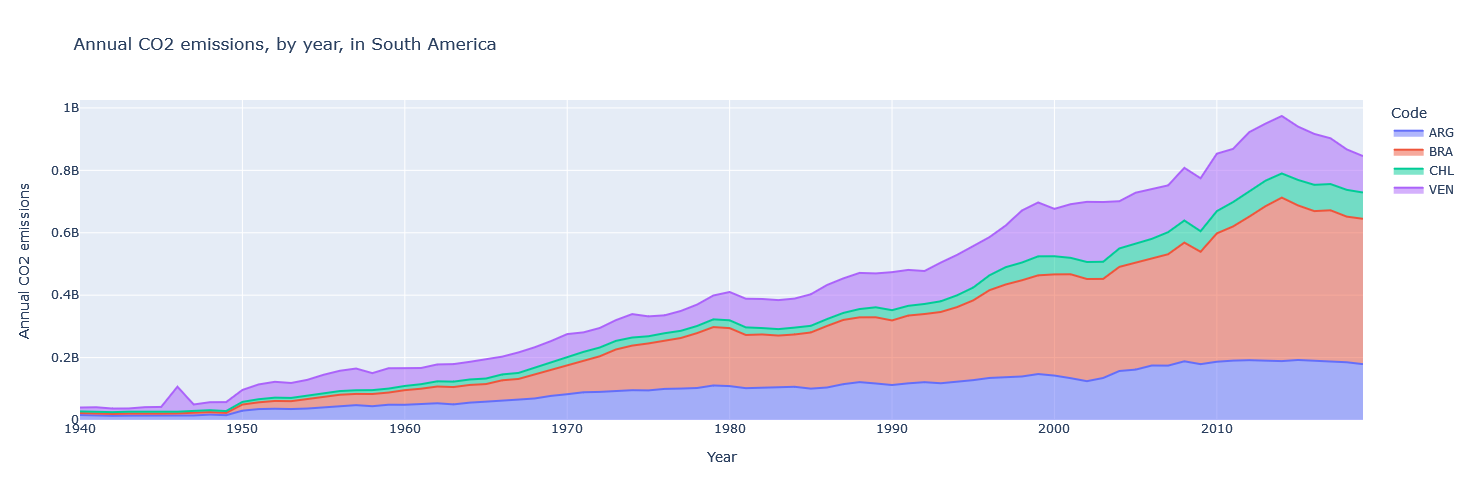

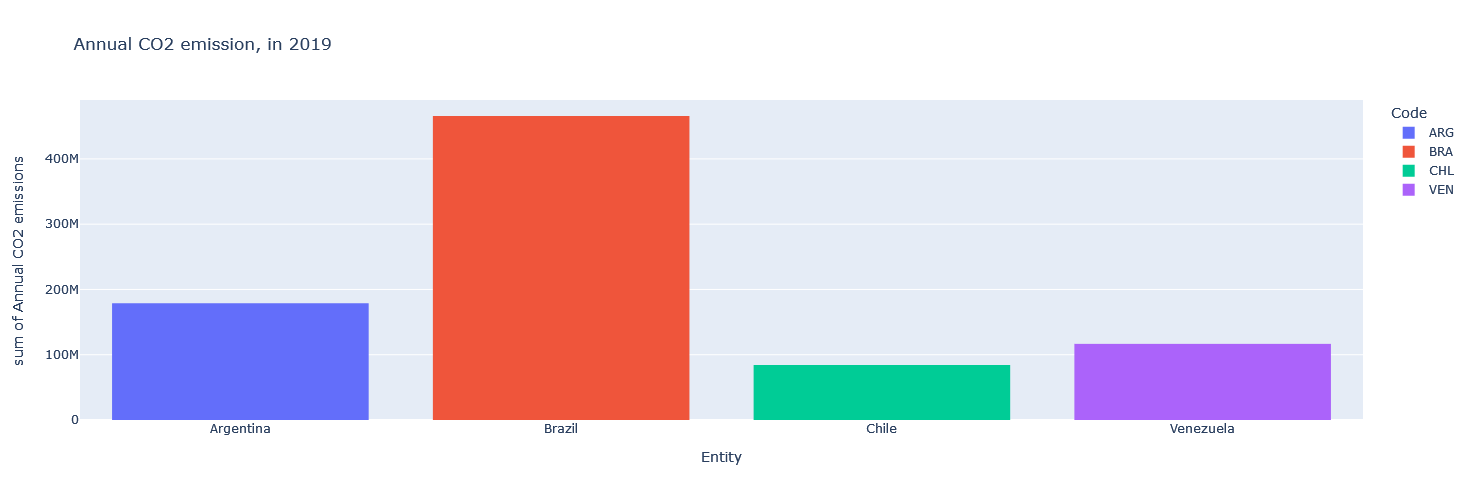

In [35]:
#filtering
south = ['Brazil', 'Argentina', 'Chile', 'Venezuela']
SA_df = df[df.Year >= 1940]
SA_df = SA_df[SA_df.Entity.isin(south)]
#plotting
fig = px.area(SA_df, x='Year', y='Annual CO2 emissions', color='Code' ,line_group="Entity", title='Annual CO2 emissions, by year, in South America', height=500)
fig.show()

SA_df = SA_df[(SA_df.Year == 2019)]
fig = px.histogram(SA_df, x='Entity', y='Annual CO2 emissions', color='Code' , title="Annual CO2 emission, in 2019", height=500)
fig.show()

>South America is one of the continents where emissions are the lowest along with Africa and Oceania. Although the pace of emissions has been increasing since the 1990s, since 2015 the dynamic appears to have reversed.

### 3.8 - NorthAmerica: Canada, USA, Mexico

> We conclude our analysis of the three most polluting continents by analyzing the emissions of countries in North America.

In [36]:
NA = ['Canada', 'Mexico', 'United States']
NA_df = df[df.Year >= 1940]
NA_df = NA_df[NA_df.Entity.isin(NA)]

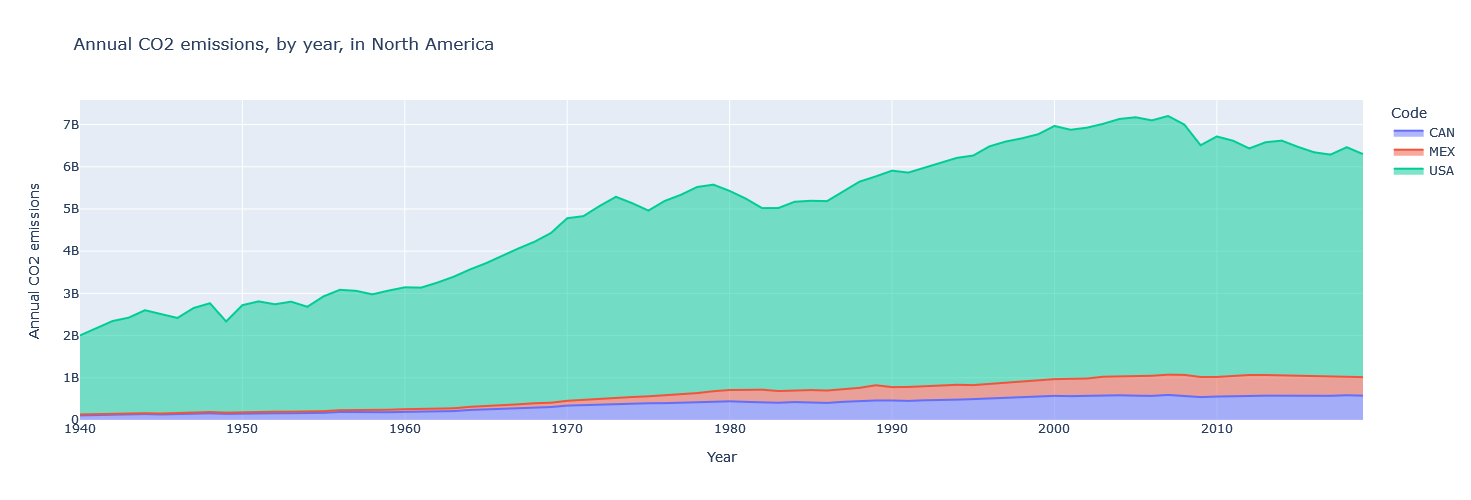

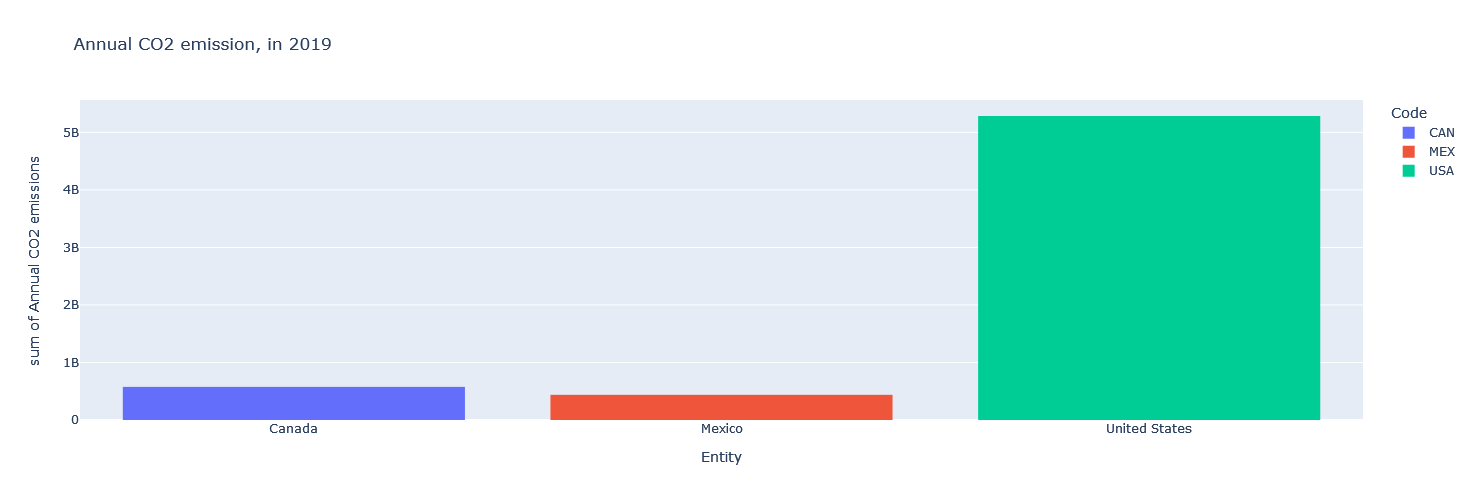

In [37]:
#plotting
fig = px.area(NA_df, x='Year', y='Annual CO2 emissions', color='Code' ,line_group="Entity", title='Annual CO2 emissions, by year, in North America', height=500)
fig.show()

NA_df = NA_df[(NA_df.Year == 2019)]
fig = px.histogram(NA_df, x='Entity', y='Annual CO2 emissions', color='Code' , title="Annual CO2 emission, in 2019", height=500)
fig.show()

>Clearly, the US is the most polluter in the area. While emissions in both Canada and Mexico seem to increase steadily and then stabilize over the last two decades, the dynamic in the US is more similar to what we observe in Europe, although the order of magnitude is more significant in the US (We can observe almost 2B of annual emission since the 1940s!). <br>
While European emissions began to stabilize in the 1980s, in the US we can see a steady growth event until the 2008, so one might wonder if the recent declines are attributable to better environmental awareness or the effects of the recent recession.

## 4. CO2 AND GDP

### 4.1 - Is there a link between GDP and emissions?

In [38]:
df = pd.read_csv(emissions_gdp)

In [39]:
df.rename(columns={"GDP per capita, PPP (constant 2017 international $)": "GDP per capita"}, inplace=True)
df_2019 = df[df.Year == 2019]

>We try to investigate the possible correlation between emissions and output per capita. We will look at data from two different groups:<br>
>- European countries with a developed economic system. These are witnessing a decrease in CO2 emissions, with a transition to greener economies.<br>
>- Asian countries still developing and industrializing. CO2 emissions in these countries are increasing or remaining stable.

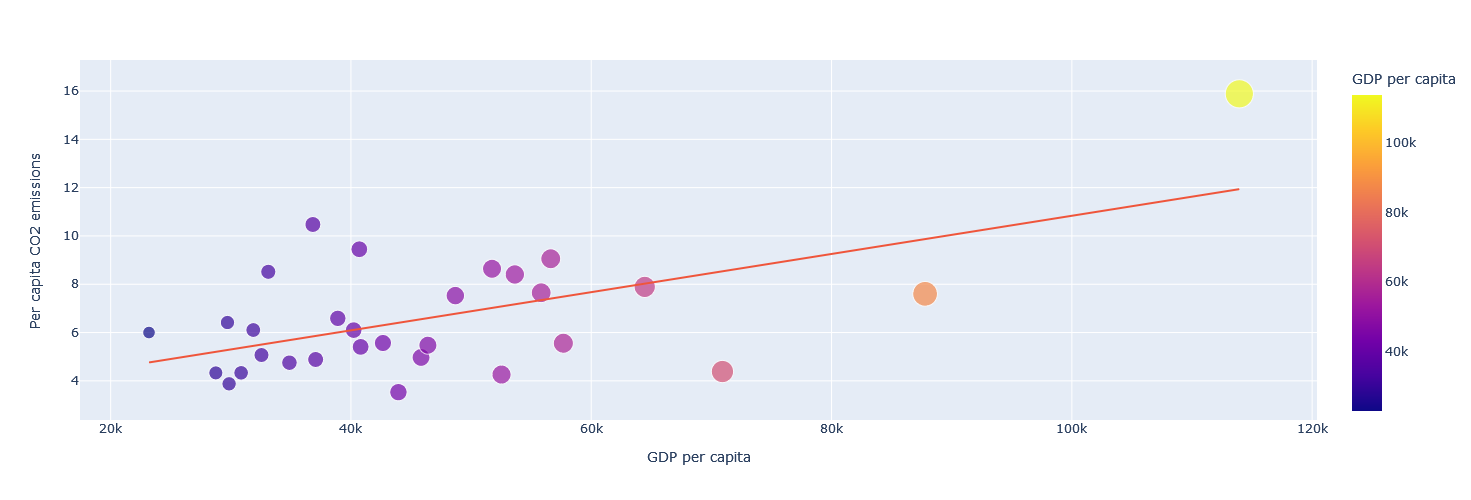

In [40]:
#Europe
df_euro = df_2019[df_2019.Entity.isin(Euro)]
fig = px.scatter(df_euro, hover_data=['Entity'], x="GDP per capita", y="Per capita CO2 emissions", color="GDP per capita", size='GDP per capita', trendline="ols", height=500)
fig.show()

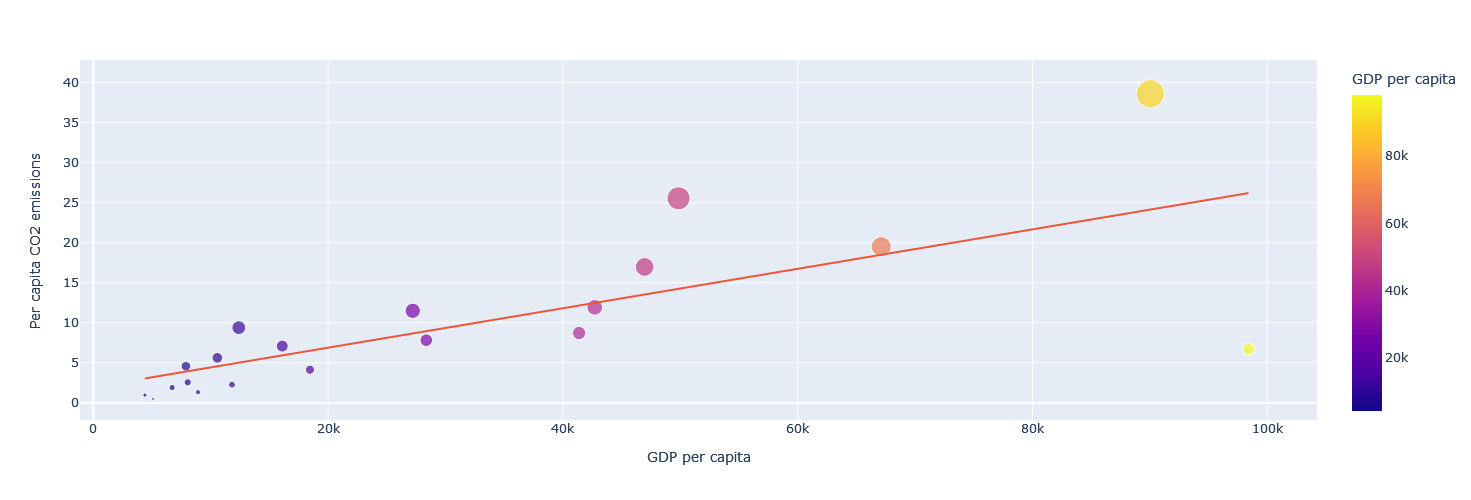

In [41]:
#Asia
asia = ['Russia', 'China', 'India', 'Iraq', 'Iran', 'Kuwait', 'United Arab Emirates', 'Saudi Arabia', 'Qatar', 
        'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam', 'South Korea', 'Japan']
df_asia = df_2019[df_2019.Entity.isin(asia)]
fig = px.scatter(df_asia, hover_data=['Entity'], x="GDP per capita", y="Per capita CO2 emissions", color="GDP per capita", size='Per capita CO2 emissions', trendline="ols", height=500)
fig.show()

>In Europe the correlation seems weak (R2 index = 0.34) while slightly more significant in Asia (R2 = 0.53). Hence, one would think that an increase in wealth in an Asian country would be more dependent on emissions than in a European one. <br>
As previously said, the cause could be found in the differences between Asian and European economic systems: in Asia, economies are more oriented on manufacturing and natural resource extraction, whereas European economies have increasingly focused on the tertiary sector. <br>
Or are the differences in the R2 index negligible: are wealth and CO2 correlated with each other, and do green policies mean less growth (and more poverty) for countries that want to decrease emissions? It's worth looking into that.

### 4.2 - Do fewer emissions mean less growth?

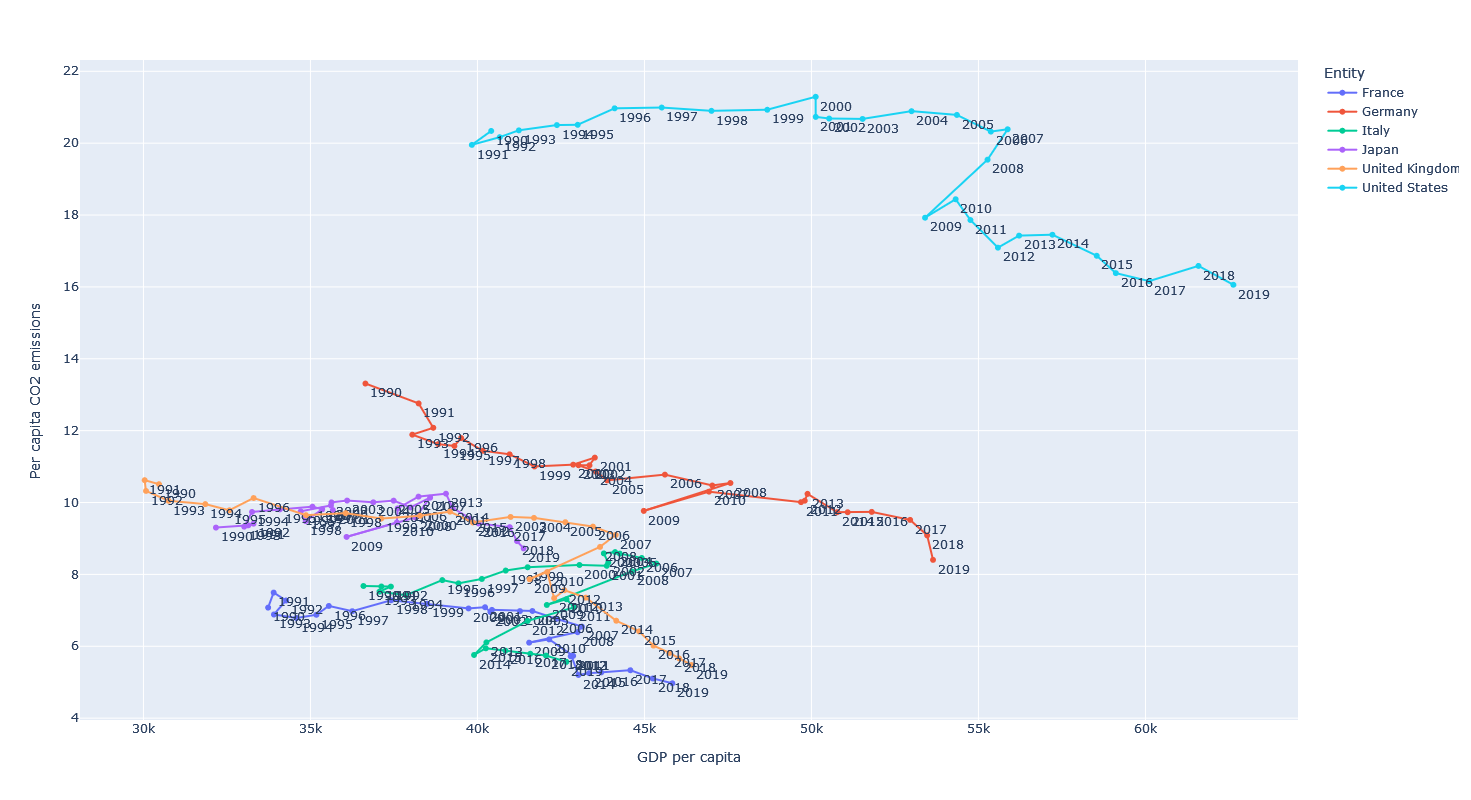

In [42]:
#Developed countries
countries = ['Germany', 'Italy', 'France', 'Japan', 'United Kingdom', 'United States']
df_developed = df[df.Entity.isin(countries)]
#Evolution in emissions per capita
fig = px.line(df_developed, x="GDP per capita", y="Per capita CO2 emissions", text='Year', color= 'Entity', height=800)
fig.update_traces(textposition="bottom right")
fig.show()

>Here we are again with the six most polluting countries among the so called "developed" ones. One of the many concerns about the transition to greener economies is the repercussions it could have on output and therefore on GDP. But what does this graph tell us? <br>
We alredy know that European countries are facing a reduction in CO2 emissions, and this trend started before 1990. But has this slowed economic growth in any way? Apparently - if we exclude the recession of 2007/2009 - not at all! <br>
As we can see, the lines follow a trend that takes them over the years towards the bottom right corner (i.e. higher GDP per capita and lower emissions per capita) of the graph.

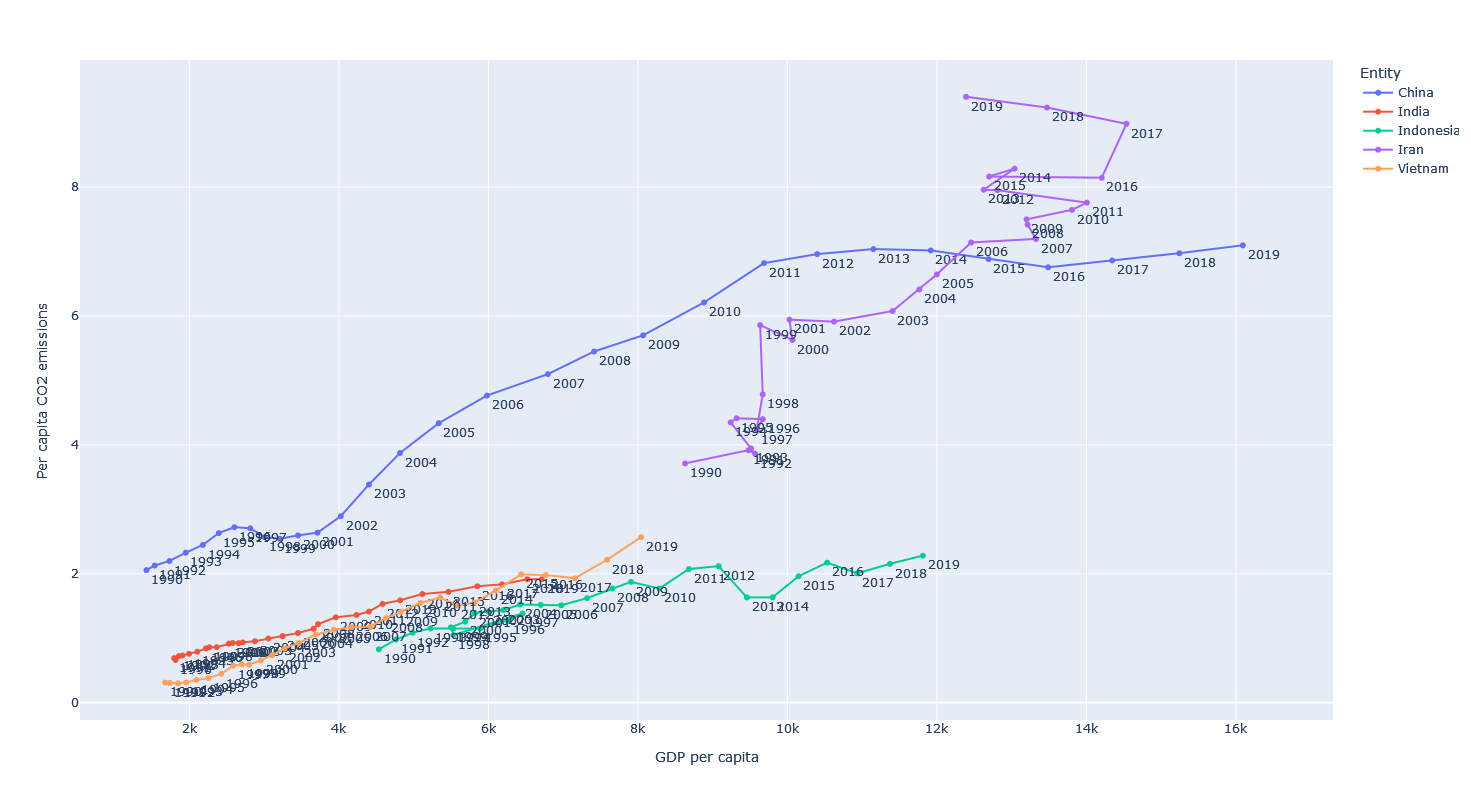

In [43]:
#Developing countries
countries = ['Indonesia', 'India', 'China', 'Iran', 'Vietnam']
df_developing = df[df.Entity.isin(countries)]
#Evolution in emissions per capita
fig = px.line(df_developing, x="GDP per capita", y="Per capita CO2 emissions", text='Year', color= 'Entity', height=800)
fig.update_traces(textposition="bottom right")
fig.show()

>Instead, what is happening for developing countries?<br> As seen from the graph on GDP and emissions, developing countries have a slightly more significant correlation between the two. I wanted to investigate specifically five countries whose annual emissions are growing at an increasing rate. The lines follow a different trend than in the previous graph: in this case increases in GDP go hand in hand with increases in CO2 per capita (i.e. we move towards the top right corner of the graph). This data can be read as a confirmation of the dependence of these types of economies on the exploitation of natural resources and the higher cost that green policies could have on their growth.

## 5. CONCLUSION

The analysis confirmed two points:<br>
First, temperature data and deviations from the median tell us that the planet is "warming," although not uniformly across the planet (especially the tropics and Northern Hemisphere), while atmospheric CO2 concentration data showed an increase in emissions in the 20th century over the previous one.<br>
<br>
Both phenomena saw a significant growth beginning in the 1960s. <br>
<br>
The focus then shifted to CO2 emissions in the various regions of the planet. In the "continents" aggregate, we can see that essentially the vast majority of emissions come from Asia, Europe and North America.<br>
Africa, South America and Oceania have much lower emissions and, despite this, according to experts, will be the areas most affected by climate change.<br>
<br>
For individual country emissions, we performed a regional analysis.<br>
<br>
First of all, Europe: almost all countries show the same pattern, i.e. a steady increase since the end of the 19th/beginning of the 20th century (coincidental with the first and second industrial revolution) followed by a negative peak after the end of the Second World War. But since the 1950s, as we know, European economies experience a recovery phase and with it CO2 emissions increase at an unprecedented rate, up to a peak in 1980. After that, a new phase begins in which emissions stabilize and seem to be on a downward trend in the present. The European Union has launched a program to achieve carbon neutrality by 2050. Despite the fact that after 1980, annual emissions stabilized and began to decline, the goal still seems very ambitious, especially in light of the small window of time between now and 2050.<br>
<br>
In Asia, China is by far the most polluting country, with emissions on an annual basis at a very high rate since the 2000s. In addition, almost all countries are emitting CO2 at an increasing rate in light of their industrialization and resource exploitation. Only South Korea and Japan have a similar trend to European countries.<br>
<br>
In North America, as is easy to expect, the U.S. accounts for almost all CO2 emissions, unlike European countries, the U.S. has seen the trend decline only after the 2008 recession. It is not possible to say with certainty whether we are seeing an effect of the economic recession or a sign of the shift toward green and more sustainable technologies.<br>
<br>
The analysis concludes with an investigation of the possible relationship between wealth and co2 emissions per capita, both measures being related to a country's economy (energy production and consumption).<br>
According to 2019 data, there is a weak correlation in Europe (R-square index =0.3) while in Asia the statistical index is higher, although an R-square of 0.53 doesn't indicates a strong correlation.
Probably the different figures between European and Asian countries are due to the very different types of economies and development systems. Where European economies are ready for a green transition, developing countries - like the ones we observed in Asia - are still heavily dependent on the exploitation of natural resources, consequently GDP is more supported by polluting activities and green policies would be more painful for growing economies: this, not surprisingly, is one of the most complex issues that has often prevented a common position from being found during climate conferences.

##### **Citation:**<br>
###### *Hannah Ritchie and Max Roser (2020) - "CO₂ and Greenhouse Gas Emissions". Published online at OurWorldInData.org. Retrieved from: https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions [Online Resource]*